# Task 2 — Empirical evaluation of a minimal perfect hash

##### ref: https://pypi.org/project/bbhash/
##### ref: https://github.com/dib-lab/pybbhash
##### ref: https://piazza.com/class/ld0gqwk4xme2vy/post/87

In [1]:
# fpr = [1/(2**7), 1/(2**8), 1/(2**10)]
# fpr

In [2]:
# ## smaller experiments to get familiarized with the functions
# import bbhash

# # some collection of 64-bit (or smaller) hashes
# uint_hashes = [i for i in range(1, 100, 4)] #[10, 20, 50, 80]

# num_threads = 16 # hopefully self-explanatory :)
# gamma = 1.0     # internal gamma parameter for BBHash

# mph = bbhash.PyMPHF(uint_hashes, len(uint_hashes), num_threads, gamma)

# # for val in uint_hashes:
# #     print('{} now hashes to {}'.format(val, mph.lookup(val)))

# # can also use 'mph.save(filename)' and 'mph = bbhash.load_mphf(filename)'.

# cnt = 0 
# total = 0
# for i in range(1000, 2000, 4):
#     if mph.lookup(i) is not None:
#         print(mph.lookup(i), i in uint_hashes)
#         cnt += 1
#     total += 1
        
# print('\nFP count', cnt)
# print('FPR', cnt/total)

In [3]:
from time import time
import random
import os
import numpy as np
import bbhash
import random

num_threads = 16
gamma = 1.0     # internal gamma parameter for BBHash

### since BBHashTable only accepts integers and we are allowed to use integers, I am taking 10,000 integers for our experiments instead. 
## ref: https://piazza.com/class/ld0gqwk4xme2vy/post/87

# with open('mit_wordlist_10000.txt', 'r') as f:
#     random_unique_words = f.readlines()
random_unique_words = [ random.randint(100, 2**32) for i in range(10_000) ] # [x.strip() for x in random_unique_words]
len(random_unique_words)

10000

In [4]:
# K_sizes_ = [1_000, 2_000, 3_000, 4_000, 5_000]

# results = -1 * np.ones([10, 5, 5]) # (num_runs, K_sizes, different_values_to_store) 

# size_of_K = K_sizes_[0]
# random.shuffle(random_unique_words)
# print('\n\n')
# print(''.join(["="] * 50))
# print("size_of_K :\t", size_of_K)

# K = random_unique_words[:size_of_K] # input keys
# Kprime_extra = random_unique_words[size_of_K:size_of_K*2] # samples that are in Kprime but not in K


# total_time = 0
# ## setting bbhash
# mph = bbhash.PyMPHF(K, len(K), num_threads, gamma)
# print(mph.lookup(0))

# ## sanity check, ensuring I have no false negatives
# fn_count = 0
# for w in K:
#     t0 = time()
#     if mph.lookup(w) is None:
#         fn_count += 1
#     total_time += (time() - t0)

# if fn_count > 0:
#     print("fn_count:", fn_count)
#     raise Exception


In [5]:
"""
For each input dataset, and for each target false positive rate, measure:
(a) what is the observed false positive rate (also, as a sanity check, ensure you have no false negatives) 
(b) what is the total time spent querying K’ and 
(c) what is the total size of the mph filter? 
"""

## dataset1

K_sizes_ = [1_000, 2_000, 3_000, 4_000, 5_000]

results = -1 * np.ones([10, 5, 5]) # (num_runs, K_sizes, different_values_to_store) 

for run_num in range(10):
    for index_k, size_of_K in enumerate(K_sizes_):
        import random
        random.shuffle(random_unique_words)
        print('\n\n')
        print(''.join(["="] * 50))
        print("size_of_K :\t", size_of_K)

        K = random_unique_words[:size_of_K] # input keys
        Kprime_extra = random_unique_words[size_of_K:size_of_K*2] # samples that are in Kprime but not in K

        
        
        ## setting bbhash
        mph = bbhash.PyMPHF(K, len(K), num_threads, gamma)
#         print(mph.lookup(0))

        ## sanity check, ensuring I have no false negatives
        fn_count = 0
        for w in K:
            if mph.lookup(w) is None:
                fn_count += 1
            
        if fn_count > 0:
            print("fn_count:", fn_count)
            raise Exception

        ## observed false positive rate
        total_time = 0
        fp_count = 0
        for w in Kprime_extra:
            t0 = time()
            if mph.lookup(w) is not None:
                fp_count += 1
            total_time += (time() - t0)

        print("fp_count:", fp_count)
        print("observed_fpr:", fp_count / (size_of_K))
        print("total_time", total_time)

        mph.save('mph.tmp')
        print(f'{index_k}, size on disk:', os.path.getsize('mph.tmp')/1000)

        results[run_num, 1, index_k] = fp_count / (size_of_K)
        results[run_num, 2, index_k] = total_time
        results[run_num, 3, index_k] = os.path.getsize(f'mph.tmp')/1000





size_of_K :	 1000
fp_count: 926
observed_fpr: 0.926
total_time 0.0002503395080566406
0, size on disk: 1.548



size_of_K :	 2000
fp_count: 1972
observed_fpr: 0.986
total_time 0.0006093978881835938
1, size on disk: 1.924



size_of_K :	 3000
fp_count: 2969
observed_fpr: 0.9896666666666667
total_time 0.0009515285491943359
2, size on disk: 2.284



size_of_K :	 4000
fp_count: 3953
observed_fpr: 0.98825
total_time 0.0011713504791259766
3, size on disk: 2.668



size_of_K :	 5000
fp_count: 4891
observed_fpr: 0.9782
total_time 0.0014085769653320312
4, size on disk: 3.06



size_of_K :	 1000
fp_count: 943
observed_fpr: 0.943
total_time 0.0002856254577636719
0, size on disk: 1.548



size_of_K :	 2000
fp_count: 1946
observed_fpr: 0.973
total_time 0.0005750656127929688
1, size on disk: 1.924



size_of_K :	 3000
fp_count: 2953
observed_fpr: 0.9843333333333333
total_time 0.0008821487426757812
2, size on disk: 2.284



size_of_K :	 4000
fp_count: 3937
observed_fpr: 0.98425
total_time 0.0011694

In [6]:
mean_results = results.mean(0)

In [7]:
# results.std(0)
mean_results[1:].shape, mean_results[0]

((4, 5), array([-1., -1., -1., -1., -1.]))

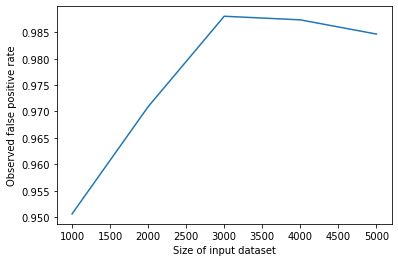

In [8]:
from matplotlib import pyplot as plt

## Check the observed false positive rate (i.e. what fraction of keys not in K return an index less than the number of elements of K when queried)

plt.plot(K_sizes_, mean_results[1, :])

plt.xlabel('Size of input dataset')
plt.ylabel('Observed false positive rate')

try:
    os.mkdir('results_task2')
except:
    print('results_task2 folder already exists.')
    
plt.savefig('results_task2/observed_false_positive_rate')

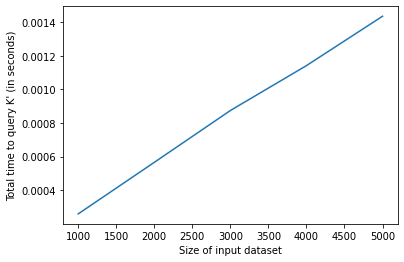

In [9]:
# the total time spent querying each K’

plt.plot(K_sizes_, mean_results[2, :])

plt.xlabel('Size of input dataset')
plt.ylabel('Total time to query K\' (in seconds)')

plt.savefig('results_task2/time_to_query_Kprime')

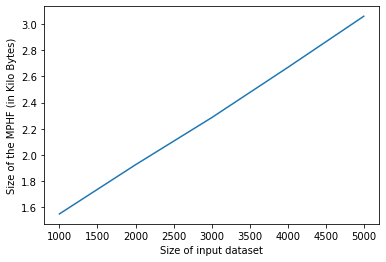

In [10]:
# the size of the MPHF

plt.plot(K_sizes_, mean_results[3, :])

plt.xlabel('Size of input dataset')
plt.ylabel('Size of the MPHF (in Kilo Bytes)')
plt.savefig('results_task2/size_of_MPHF')

In [11]:
## How do these compare to the bloom filter? 
## -> 


## How does the false positive rate compare to the expectations you had before you performed this experiment?
## -> 